How people are reacting on corona by analyzing 100 tweets.

General Report: 
Positive

Detailed Report: 
41.00% people thought it was positive
25.00% people thought it was negative
34.00% people thought it was neutral


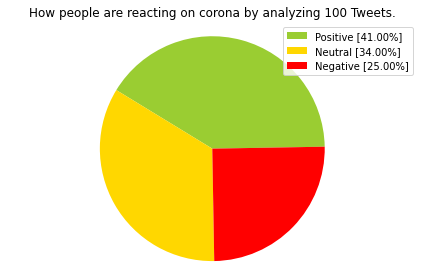

In [4]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt


class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        consumer_key = '2NRaJjiOUmYJ4dbB2zS7235VH'
        consumer_secret = 'Haf4MsVQBcum41Oz4Zp1g6irlgOudfS7xkHvwUqfLebI8gpvRD'

        auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = 'corona' #input("Enter Keyword/Tag to search about: ")
        NoOfTerms = 100 #int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        neutral = 0
        positive = 0
        negative = 0
        polarity = 0


        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0):
                positive += 1
            elif (analysis.sentiment.polarity < 0):
                negative += 1
            


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0):
            print("Positive")
        elif (polarity < 0):
            print("Negative")
        

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(negative) + "% people thought it was negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, negative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, negative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]']
        sizes = [positive, neutral, negative]
        colors = ['yellowgreen', 'gold', 'red']
        patches, texts = plt.pie(sizes, colors=colors, startangle=1)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()